In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

file = 'prices1.csv'


In [2]:

data = pd.read_csv(file, index_col='Transaction_time')
data = data.drop('Unnamed: 0', axis=1)
data.index = pd.to_datetime(data.index)

data.columns= ['gem_p', 'mf', 'delta', 'tr_f','wf','pd','gdax_p']
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data=data[cols]

print(data.info())


               

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1122 entries, 2017-12-08 14:44:30.804222 to 2017-12-08 15:08:03.224190
Data columns (total 7 columns):
gdax_p    1122 non-null float64
gem_p     1122 non-null float64
mf        1122 non-null float64
delta     1122 non-null float64
tr_f      1122 non-null float64
wf        1122 non-null float64
pd        1122 non-null float64
dtypes: float64(7)
memory usage: 70.1 KB
None


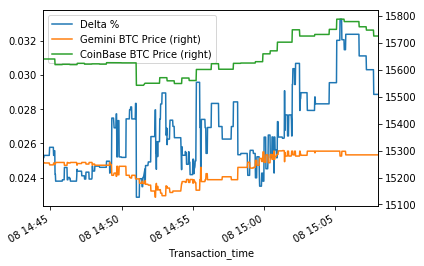

In [3]:
#Simple Line Plot
data.pd.plot(label="Delta %", legend=True)
data.gem_p.plot(secondary_y= True, label = 'Gemini BTC Price', legend = True)
data.gdax_p.plot(secondary_y= True,label= "CoinBase BTC Price", legend=True)
plt.show()

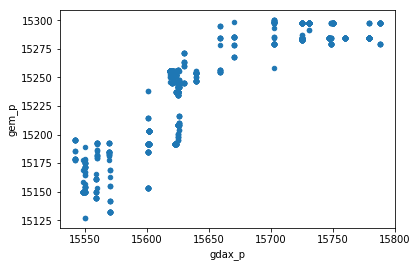

In [4]:
#Scatter Plot
data.plot(kind='scatter', x ='gdax_p', y= 'gem_p')
plt.show()

In [5]:
#Save price data in two separate arrays
data=data.resample('5s').mean()
num1=data['gem_p']
num2 =data['gdax_p']
num2.head()

Transaction_time
2017-12-08 14:44:30    15639.99
2017-12-08 14:44:35    15639.99
2017-12-08 14:44:40    15639.99
2017-12-08 14:44:45    15639.99
2017-12-08 14:44:50    15639.99
Freq: 5S, Name: gdax_p, dtype: float64

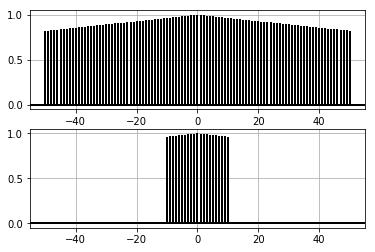

In [6]:
#Cross-correlation analysis with lagged 
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.xcorr(num2, num1, usevlines=True, maxlags=50, normed=True, lw=2)
ax1.grid(True)
ax1.axhline(0, color='black', lw=2)

ax2 = fig.add_subplot(212, sharex=ax1)
ax2.acorr(num2, usevlines=True, normed=True, maxlags=10, lw=2)
ax2.grid(True)
ax2.axhline(0, color='black', lw=2)

plt.show()

NameError: name 'x_cor' is not defined